1. Window design method
2. Frequency sampling method
3. Least MSE (mean square error) method
4. Parks–McClellan method
5. Equiripple FIR filters 

Integration by parts

$$
\begin{align}
(uv)' &= u'v + uv' \tag{1} \\
uv = \int ({uv})'{dx} &= \int ({u}'{v} + {u}{v}'){dx} = \int ({u}'{v}){dx} + \int ({u}{v}'){dx} \tag{2} \\
\end{align}
$$

Now we can find $\int ({u}'{v}){dx}$ with $equation~2$
$$
\int ({u}'{v}){dx} = uv - \int ({u}{v}'){dx} \tag{3}
$$

$$
\begin{align}
I &=   \int_{-\infty}^{\infty} \frac{sin(x)}{x}{dx} \\
  &= 2 \int_{0}^{\infty}       \frac{sin(x)}{x}{dx} \\
  &= 2 \int_{0}^{\infty}       sin(x) (\int_{0}^{\infty} e^{-xt}{dt}) {dx} \\
  &= 2 \int_{0}^{\infty} (\int_{0}^{\infty} sin(x) e^{-xt} {dx}){dt} \tag{4}
\end{align}
$$

In $equation~4$, the we should solve $\int_{0}^{\infty} sin(x)e^{-tx}{dx}$ at first with integration by parts method, assume $u'$ as $sin(x)$, $v$ as $e^{-tx}$, then we can know $u$ is $-cos(x)$ and $v'$ is $-te^{-tx}$.

$$
\begin{align}
\int sin(x)e^{-tx}{dx} & = -cos(x)e^{-tx} -  \int -cos(x)(-t)e^{-tx}{dx} \\
                       & = -cos(x)e^{-tx} - t\int  cos(x)e^{-tx}{dx} \tag{5}
\end{align}
$$

In $equation~5$, we can adopt another integration by parts method, assume $u'$ as $cos(x)$, $v$ as $e^{-tx}$, then we can know $u$ is $sin(x)$ and $v'$ is $-te^{-tx}$.

$$
\begin{align}
\int cos(x)e^{-tx}{dx} &= sin(x)e^{-tx} -  \int sin(x)(-t)e^{-tx}{dx} \\
                       &= sin(x)e^{-tx} + t\int sin(x)    e^{-tx}{dx} \tag{6}
\end{align}
$$

With $equation~6$, we rewrite $equation~5$.
$$
\begin{align}
\int sin(x)e^{-tx}{dx} &= -cos(x)e^{-tx} - t(sin(x)e^{-tx} + t\int sin(x)e^{-tx}{dx}) \\
                       &= -cos(x)e^{-tx} - t sin(x)e^{-tx} - t^{2}\int sin(x)e^{-tx}{dx} \\                       
\end{align}
$$

And some refactoring...
$$
\begin{align}
(t^{2}+1)\int sin(x)e^{-tx}{dx} &= -cos(x)e^{-tx} - t sin(x)e^{-tx} \\     
         \int sin(x)e^{-tx}{dx} &= \frac{-cos(x)e^{-tx} - t sin(x)e^{-tx}}{t^{2}+1} \\
                                &= \frac{-e^{-tx}(cos(x) + t sin(x))}{t^{2}+1} \tag{7}
\end{align}
$$

With $equation~7$, we can finally compute the boundries:
$$
\begin{align}
\int_{0}^{\infty} sin(x)e^{-tx}{dx} &= 0 - (-\frac{1}{t^{2}+1}) \\
                                    &= \frac{1}{t^{2}+1} \tag{8}
\end{align}
$$

With $equation~8$ and $equation~4$.
$$
\begin{align}
I &= 2 \int_{0}^{\infty} (\int_{0}^{\infty} sin(x) e^{-xt} {dx}){dt} \\
  &= 2 \int_{0}^{\infty} \frac{1}{t^{2}+1}{dt}                       \\
  &= 2 \frac{\pi}{2}                                                 
  &= \pi
\end{align}
$$

In [1]:
import math
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

In [2]:
n = 101
center = round((n-1)/2)
fc = 0.2
f_band = 0.1

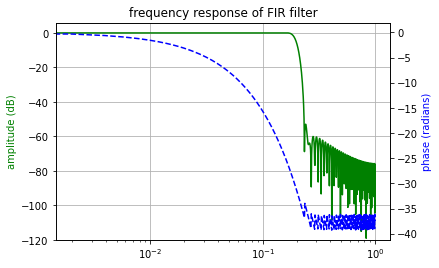

In [3]:
taps = signal.firwin(n, cutoff = fc, window = "hamming")

w, h = signal.freqz(taps)

amplitude = 20 * np.log10(abs(h))
angle = np.unwrap(np.angle(h))

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

plt.title('frequency response of FIR filter')
plt.xlabel(r'normalized frequency (x$\pi$rad/sample)')

ax1.plot(w/max(w), amplitude, 'g')
ax1.set_ylabel('amplitude (dB)', color='g')
ax1.set_ylim(-120, 6)
ax1.grid()

ax2.plot(w/max(w), angle, 'b--')
ax2.set_ylabel('phase (radians)', color='b')

plt.xscale("log")
plt.show()

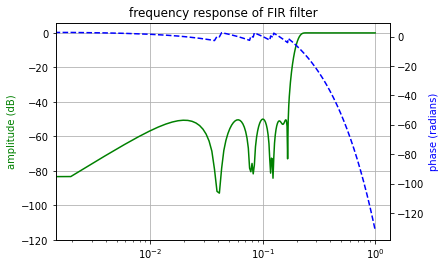

In [4]:
taps = -signal.firwin(n, cutoff = fc, window = "hamming")
taps[center] = taps[center] + 1

w, h = signal.freqz(taps)

amplitude = 20 * np.log10(abs(h))
angle = np.unwrap(np.angle(h))

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

plt.title('frequency response of FIR filter')
plt.xlabel(r'normalized frequency (x$\pi$rad/sample)')

ax1.plot(w/max(w), amplitude, 'g')
ax1.set_ylabel('amplitude (dB)', color='g')
ax1.set_ylim(-120, 6)
ax1.grid()

ax2.plot(w/max(w), angle, 'b--')
ax2.set_ylabel('phase (radians)', color='b')

plt.xscale("log")
plt.show()

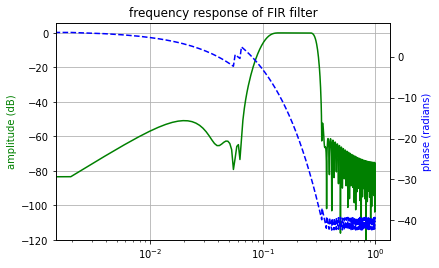

In [5]:
lp_taps = signal.firwin(n, cutoff = fc - f_band, window = 'hamming')

hp_taps = -signal.firwin(n, cutoff = fc + f_band, window = 'hamming')
hp_taps[center] = hp_taps[center] + 1

band_padd = -(lp_taps + hp_taps)
band_padd[center] = band_padd[center] + 1

w, h = signal.freqz(band_padd)

amplitude = 20 * np.log10(abs(h))
angle = np.unwrap(np.angle(h))

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

plt.title('frequency response of FIR filter')
plt.xlabel(r'normalized frequency (x$\pi$rad/sample)')

ax1.plot(w/max(w), amplitude, 'g')
ax1.set_ylabel('amplitude (dB)', color='g')
ax1.set_ylim(-120, 6)
ax1.grid()

ax2.plot(w/max(w), angle, 'b--')
ax2.set_ylabel('phase (radians)', color='b')

plt.xscale("log")
plt.show()

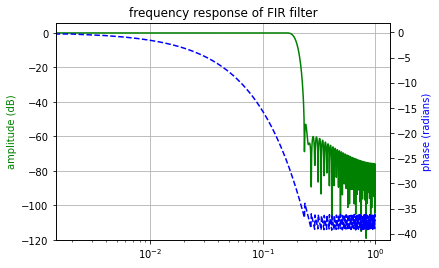

In [6]:
# This method is equivalent to firwin
center = round((n-1)/2)
t = np.linspace(-center, center, n)
taps = fc * np.sinc(t * fc) * signal.windows.hamming(n)

w, h = signal.freqz(taps)

amplitude = 20 * np.log10(abs(h))
angle = np.unwrap(np.angle(h))

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

plt.title('frequency response of FIR filter')
plt.xlabel(r'normalized frequency (x$\pi$rad/sample)')

ax1.plot(w/max(w), amplitude, 'g')
ax1.set_ylabel('amplitude (dB)', color='g')
ax1.set_ylim(-120, 6)
ax1.grid()

ax2.plot(w/max(w), angle, 'b--')
ax2.set_ylabel('phase (radians)', color='b')

plt.xscale("log")
plt.show()

[-47.5  -46.55 -45.6  -44.65 -43.7  -42.75 -41.8  -40.85 -39.9  -38.95
 -38.   -37.05 -36.1  -35.15 -34.2  -33.25 -32.3  -31.35 -30.4  -29.45
 -28.5  -27.55 -26.6  -25.65 -24.7  -23.75 -22.8  -21.85 -20.9  -19.95
 -19.   -18.05 -17.1  -16.15 -15.2  -14.25 -13.3  -12.35 -11.4  -10.45
  -9.5   -8.55  -7.6   -6.65  -5.7   -4.75  -3.8   -2.85  -1.9   -0.95
   0.     0.95   1.9    2.85   3.8    4.75   5.7    6.65   7.6    8.55
   9.5   10.45  11.4   12.35  13.3   14.25  15.2   16.15  17.1   18.05
  19.    19.95  20.9   21.85  22.8   23.75  24.7   25.65  26.6   27.55
  28.5   29.45  30.4   31.35  32.3   33.25  34.2   35.15  36.1   37.05
  38.    38.95  39.9   40.85  41.8   42.75  43.7   44.65  45.6   46.55
  47.5 ]


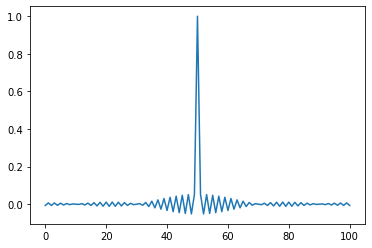

In [18]:
arr = t * 0.95
print(arr)
plt.plot(np.sinc(arr))
plt.show()